In [1]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer, PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import pickle
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Load Cleaned Data

In [5]:
data = pd.read_csv('./processed_data/processed_toxic_comments.csv')

data.head(5)

,processed_tweet,class
0,rt as a woman you shouldn t complain abo...,2
1,rt boy dats cold tyga dwn bad for cu...,1
2,rt dawg rt you ever fuck a bitc...,1
3,rt she look like a tranny,1
4,rt the shit you hear about me ...,1


In [6]:
data.shape

(24783, 2)

In [7]:
print(data.shape)
print(data['class'].value_counts())

(24783, 2)
class
1    19190
2     4163
0     1430
Name: count, dtype: int64


## Data processing : Filtering and Lemmatization

In [8]:
# Text processing functions
def clean_text(text):
    text = re.sub(r'@\w+', '', text)  # Remove username
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-zA-Z]', ' ', text)  # Keep alphabets
    text = text.lower()
    return text

In [9]:
def tokenization(text):
  tokens = text.split()
  return tokens

In [10]:

def filter_stopwords(text):
  stop_words = set(stopwords.words('english'))
  filtered_words = [word for word in text if word not in stop_words]
  return filtered_words

In [11]:

stemmer = PorterStemmer()

def stemming(text):
  stemmed_text = [stemmer.stem(word) for word in text]
  return stemmed_text

In [12]:
lemmatizer = WordNetLemmatizer()

def lemmatization(text):
    lemm_text = [lemmatizer.lemmatize(word) for word in text]
    return lemm_text

In [13]:
def join_token(text):
    sentence = ' '.join(text)
    return sentence

In [15]:
# data['processed_tweet'] = data['processed_tweet'].apply(clean_text)
data['processed_tweet'] = data['processed_tweet'].apply(tokenization)
data['processed_tweet'] = data['processed_tweet'].apply(filter_stopwords)
data['processed_tweet'] = data['processed_tweet'].apply(stemming)
data['processed_tweet'] = data['processed_tweet'].apply(lemmatization)
data['processed_tweet'] =data['processed_tweet'].apply(join_token)



## Data Splitting

In [16]:
X = data['processed_tweet']
y = data['class']


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((19826,), (4957,), (19826,), (4957,))

In [17]:
# Save the training data for fitting the vectorizer later
with open('./utilities/X_train.pkl', 'wb') as f:
    pickle.dump(X_train, f)

## Feature Extraction

In [18]:
# from sklearn.feature_extraction.text import CountVectorizer
# vectorizer = CountVectorizer()
# X_train_vectorized = vectorizer.fit_transform(X_train)
# X_test_vectorized = vectorizer.transform(X_test)

In [18]:
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [19]:
print(X_train_vectorized.shape)
print(X_test_vectorized.shape)

(19826, 13549)
(4957, 13549)


In [ ]:
print(X_train_vectorized)


  (0, 5431)	0.23649070351742754
  (0, 8951)	0.26606478886538504
  (0, 9249)	0.25574119930433586
  (0, 8664)	0.33445135270975396
  (0, 8747)	0.2998368933526797
  (0, 5553)	0.4167657098841411
  (0, 4253)	0.28609107254535887
  (0, 12598)	0.24349578987060422
  (0, 4646)	0.15029016557225103
  (0, 9195)	0.28609107254535887
  (0, 13129)	0.21152630561589372
  (0, 3588)	0.27714212895185814
  (0, 13031)	0.23852107233763975
  (0, 10048)	0.09169302418887529
  (1, 13361)	0.3313850817902718
  (1, 1097)	0.24889257313007213
  (1, 6266)	0.4129518985649953
  (1, 8938)	0.328793253250854
  (1, 10358)	0.2567620349127659
  (1, 8841)	0.5380343069017925
  (1, 11871)	0.2928395509478639
  (1, 4477)	0.32930150336833997
  (2, 1116)	0.171383464907368
  (2, 7495)	0.6859048992701916
  (2, 8137)	0.3355957673018984
  :	:
  (19823, 339)	0.5975023177057892
  (19823, 1445)	0.29513215299263656
  (19823, 13422)	0.2458387409913637
  (19823, 5983)	0.2458387409913637
  (19823, 5984)	0.23137056959894764
  (19823, 359)	0.245838

## Training model

In [20]:
LR_model = LogisticRegression()
LR_model.fit(X_train_vectorized, y_train)

LogisticRegression()

Accuracy: 0.8959047811176114
              precision    recall  f1-score   support

           0       0.55      0.17      0.26       290
           1       0.91      0.96      0.94      3832
           2       0.84      0.84      0.84       835

    accuracy                           0.90      4957
   macro avg       0.77      0.66      0.68      4957
weighted avg       0.88      0.90      0.88      4957



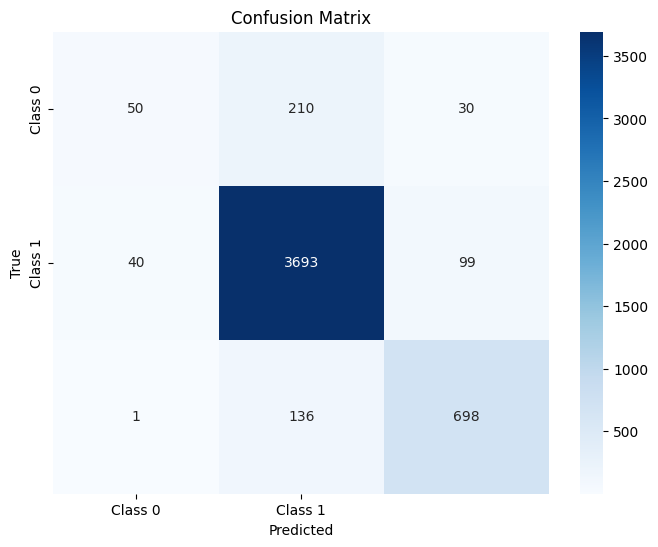

In [21]:
y_pred = LR_model.predict(X_test_vectorized)
print("Accuracy:",accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))
cm = confusion_matrix(y_test, y_pred)
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [22]:
DT_model = DecisionTreeClassifier()
DT_model.fit(X_train_vectorized, y_train)

DecisionTreeClassifier()

Accuracy: 0.8733104700423643
              precision    recall  f1-score   support

           0       0.27      0.22      0.24       290
           1       0.92      0.94      0.93      3832
           2       0.84      0.81      0.83       835

    accuracy                           0.87      4957
   macro avg       0.68      0.66      0.67      4957
weighted avg       0.87      0.87      0.87      4957



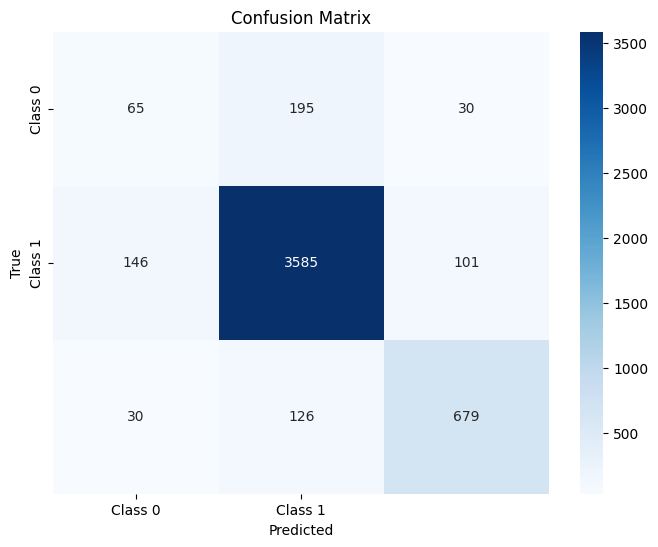

In [23]:
y_pred = DT_model.predict(X_test_vectorized)
print("Accuracy:",accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))
cm = confusion_matrix(y_test, y_pred)
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [17]:
RF_model = RandomForestClassifier()
RF_model.fit(X_train_vectorized, y_train)


RandomForestClassifier()

Accuracy: 0.8205128205128205
              precision    recall  f1-score   support

           0       0.82      0.69      0.75       313
           1       0.81      0.86      0.83       295
           2       0.84      0.94      0.88       250

    accuracy                           0.82       858
   macro avg       0.82      0.83      0.82       858
weighted avg       0.82      0.82      0.82       858



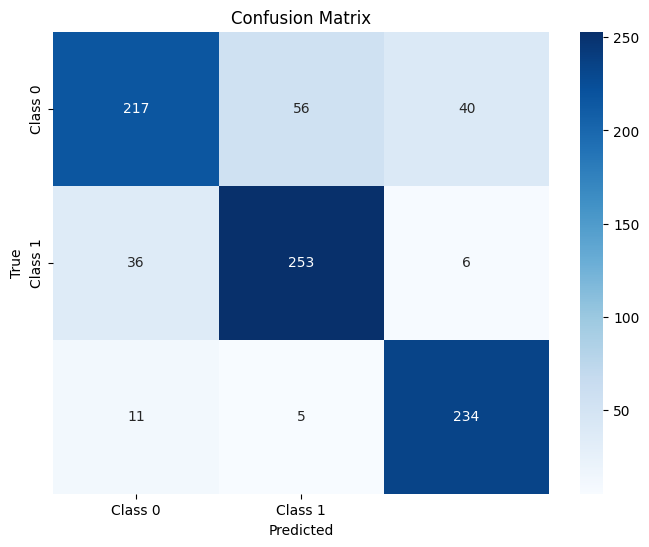

In [20]:
y_pred = RF_model.predict(X_test_vectorized)
print("Accuracy:",accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Fine Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'], 'solver': ['liblinear']}

# Initialize and tune the model
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_vectorized, y_train)

# Best parameters
print("Best parameters:", grid_search.best_params_)

# Use the best model
LR_model = grid_search.best_estimator_

In [ ]:
param_grid = {
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_vectorized, y_train)

# Best parameters
print("Best parameters:", grid_search.best_params_)

# Use the best model
DT_model = grid_search.best_estimator_


In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_vectorized, y_train)

# Best parameters
print("Best parameters:", grid_search.best_params_)

# Use the best model
RF_model = grid_search.best_estimator_


## Prediction function

In [27]:
def myModel(comment):
  comment_df = pd.DataFrame({'tweet': [comment]})
  comment_df = clean_text(str(comment_df))
  comment_df = filter_stopwords(comment_df)
  comment_df = stemming(comment_df)
  comment_df = join_token(comment_df)
  comment_df = vectorizer.transform([comment_df])
  # probabilities = LR_model.predict_proba(comment_df)
  probabilities = DT_model.predict_proba(comment_df)
  # probabilities = LR_model.predict_proba(comment_df)
    

    # Map predicted class to label
  labels = {0: 'Hate', 1: 'Offensive', 2: 'Neutral'}
  predicted_class = probabilities.argmax()  # Get class with highest probability

  return {
        "Predicted Label": labels[predicted_class],
        "Probabilities": {
            "Hate": probabilities[0][0],
            "Offensive": probabilities[0][1],
            "Neutral": probabilities[0][2],
        }
    }

In [28]:
comment = 'It fcking want to kill you'
myModel(comment)

{'Predicted Label': 'Neutral',
 'Probabilities': {'Hate': 0.0, 'Offensive': 0.0, 'Neutral': 1.0}}

In [36]:
#save model
filename = './final_models/finalized_model.sav'
pickle.dump(LR_model, open(filename, 'wb'))